### Pseudo Code for Max-Flow:

1. Initialize flow to zero for all edges.
 
2. While there is an augmenting path from source (s) to sink (t) in the residual graph:

    - Find a simple s-t path in the residual graph.
    - Augment the flow along that path.
    - Update the flow in the residual graph.
    - Update the residual capacities.
3. Return the maximum flow.


Iteration 1 - Augmenting Path (parent array): [-1, 0, 0, 1]
Path flow (bottleneck capacity) found: 10
The maximum flow after iteration 1: 10


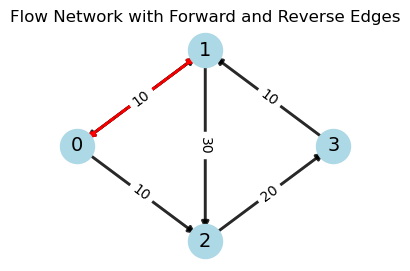


Iteration 2 - Augmenting Path (parent array): [-1, 0, 0, 2]
Path flow (bottleneck capacity) found: 10
The maximum flow after iteration 2: 20


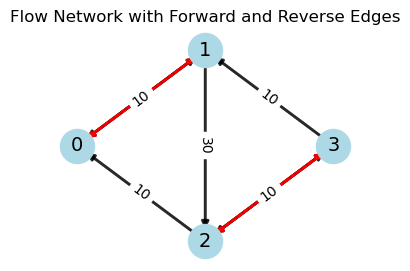


Iteration 3 - Augmenting Path (parent array): [-1, 0, 1, 2]
Path flow (bottleneck capacity) found: 10
The maximum flow after iteration 3: 30


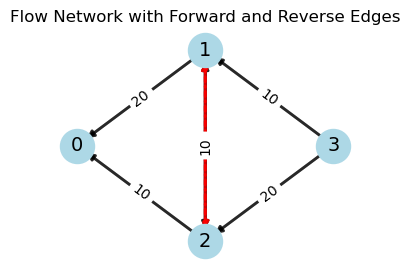


Final Maximum Flow: 30


In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Function to perform BFS and find an augmenting path
def bfs(capacity, source, sink, parent):
    visited = [False] * len(capacity)
    queue = deque([source])
    visited[source] = True
    
    while queue:
        u = queue.popleft()
        
        # Explore all the adjacent vertices of u
        for v, cap in enumerate(capacity[u]):
            if not visited[v] and cap > 0:  # only consider vertices with residual capacity
                queue.append(v)
                visited[v] = True
                parent[v] = u  # stores the node u that leads to node v in the augmenting path
                                # e.g., parent = [-1, 0, 0, 1] -> parent[3] = 1, then parent[1] = 0, the source
                                # so the augmenting path found is: 0 -> 1 -> 3
                
                # If we reached the sink, stop the search
                if v == sink:
                    return True
                
    return False

# Ford-Fulkerson Algorithm to compute the maximum flow with visualizations at each step
def ford_fulkerson(capacity, source, sink, pos):
    parent = [-1] * len(capacity)  # To store the augmenting path
    max_flow = 0  # Initialize the maximum flow to 0
    
    iteration = 1
    
    '''MAX-FLOW: INITIALLY F(E) = 0 FOR ALL E IN G'''
    
    # Augment the flow while there is a path from source to sink
    '''WHILE THERE IS AN S-T PATH IN THE RESIDUAL GRAPH G_F'''
    while bfs(capacity, source, sink, parent):
        print(f"\nIteration {iteration} - Augmenting Path (parent array): {parent}")
        
        '''LET P BE A SIMPLE S-T PATH IN G_F'''
        # Find the maximum flow in the augmenting path
        path_flow = float('Inf')  # Start with infinity, ensuring that any capacity encountered will be smaller and will update path_flow
        v = sink
        while v != source:  # Work the way backwards towards the source using the parent array (filled by BFS)
            u = parent[v]
            path_flow = min(path_flow, capacity[u][v])  # Set path_flow to the smallest capacity along the entire path (bottleneck capacity)
            v = u
        
        print(f"Path flow (bottleneck capacity) found: {path_flow}")
        
        '''F' = AUGMENT(F, P)'''
        # Update residual capacities of the edges and reverse edges along the path
        v = sink
        while v != source:  # Start from the sink
            u = parent[v]  # Get the previous node (u) from the parent array
            capacity[u][v] -= path_flow  # Reduce capacity by the flow we just sent
            capacity[v][u] += path_flow  # Increase capacity of the reverse edge
            v = u  # Move to the previous node in the path
        
        '''UPDATE F TO BE F' '''
        # Add path flow to the overall flow
        max_flow += path_flow
        print(f"The maximum flow after iteration {iteration}: {max_flow}")
        
        '''UPDATE THE RESIDUAL GRAPH G_F TO BE G_F' '''
        # Visualize the updated network
        draw_network(capacity, pos)
        
        iteration += 1
    
    '''ENDWHILE'''
    
    '''RETURN F'''
    return max_flow

# Function to convert edge list to adjacency matrix
def build_capacity_matrix(edges, n):
    capacity = [[0] * n for _ in range(n)]  # Initialize n x n matrix with 0
    for u, v, cap in edges:
        capacity[u][v] = cap  # Set the capacity for each edge
    return capacity

# Function to draw the network with manual positions
def draw_network(capacity, pos):
    G = nx.MultiDiGraph()  # Use MultiDiGraph to allow parallel edges in opposite directions

    # Add forward and reverse edges based on the current capacity matrix
    for u in range(len(capacity)):
        for v in range(len(capacity[u])):
            if capacity[u][v] > 0:  # Forward edge
                G.add_edge(u, v, capacity=capacity[u][v])  # Add the forward edge
            if capacity[v][u] > 0:  # Reverse edge
                G.add_edge(v, u, capacity=capacity[v][u])  # Add the reverse edge

    # Drawing the graph with node labels
    plt.figure(figsize=(4, 3))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=600)  # Draw nodes
    nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif")

    # Draw edges
    forward_edges = [(u, v) for u, v in G.edges() if capacity[u][v] > 0]
    reverse_edges = [(v, u) for u, v in G.edges() if capacity[v][u] > 0]

    # Draw forward edges with solid lines
    nx.draw_networkx_edges(G, pos, edgelist=forward_edges, width=2, alpha=0.6, edge_color='black', arrows=True)

    # Draw reverse edges with dashed lines
    nx.draw_networkx_edges(G, pos, edgelist=reverse_edges, width=2, alpha=0.6, edge_color='red', style='dashed', arrows=True)

    # Draw edge labels for both forward and reverse edges
    edge_labels = {(u, v): f"{capacity[u][v]}" for u, v in forward_edges}
    edge_labels.update({(v, u): f"{capacity[v][u]}" for v, u in reverse_edges})
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Add a title and remove the axis
    plt.title("Flow Network with Forward and Reverse Edges")
    plt.axis('off')
    plt.show()


# Example usage with integers as node names
if __name__ == "__main__":
    # List of edges as (source, target, capacity) tuples using integer nodes
    edges = [(0, 1, 20), (0, 2, 10), 
             (1, 3, 10), (1, 2, 30), 
             (2, 3, 20)]
    
    num_vertices = 4  # Number of vertices
    source = 0  # Source node
    sink = 3    # Sink node
    
    # Build the capacity matrix from the edges
    capacity = build_capacity_matrix(edges, num_vertices)
    
    # Generate fixed positions for nodes to maintain the same shape
    pos = {
        0: (0, 0),  # Source node
        1: (1, 1),
        2: (1, -1),
        3: (2, 0)  # Sink node
    }
    
    # Run the Ford-Fulkerson algorithm to compute the maximum flow with visualizations
    max_flow = ford_fulkerson(capacity, source, sink, pos)
    print(f"\nFinal Maximum Flow: {max_flow}")


BFS for Augmenting Path: The bfs function finds an augmenting path in the residual graph by checking which rooms (nodes) are connected and have residual capacity.

Ford-Fulkerson Algorithm: The main ford_fulkerson function uses BFS repeatedly to find and augment paths until no more augmenting paths exist. Each augmenting path found increases the overall flow.

Building the Capacity Matrix: The capacity matrix is built based on the GCD between room numbers. If the GCD of two room numbers is greater than 1, the capacity between those rooms is set to that GCD.